# Libs and SOS instance

In [28]:
%load_ext autoreload
%autoreload 2

from sos4py.main import connection_sos
from sos4py.sos_2_0_0 import SOSGetFeatureOfInterestResponse

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

import folium
import contextily as ctx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Create SOS instance 
fluggs_sos = connection_sos("https://fluggs.wupperverband.de/sos2/service")

# 1) Learn about content of SOS 

#### Service

In [3]:
print(fluggs_sos.sosServiceIdentification())
#print(fluggs_sos.sosServiceIdentification()['profiles'])

_root                [[], [], [[], [], []], [], [], [], [], [], [],...
title                                                Wupperverband SOS
abstract             Wupperverband Sensor Observation Service - Dat...
keywords                      [Gewässergüte, Hydrologie, Meteorologie]
accessconstraints    http://fluggs.wupperverband.de/fluggs-cms-bild...
fees                                                              NONE
type                                                           OGC:SOS
service                                                        OGC:SOS
version                                                          2.0.0
versions                                                       [2.0.0]
profiles             [http://www.opengis.net/spec/OMXML/2.0/conf/ca...
Name: ServiceIdentification, dtype: object


#### Provider

In [4]:
print(fluggs_sos.sosProvider())

_root           [[], [], [[], [], [<Element {http://www.opengi...
name                                                          TBA
organization                                                 None
site                                  http://www.wupperverband.de
role                                                         None
position                                                      TBA
phone                                             +49(0)202/583-0
fax                                                          None
address                            Untere Lichtenplatzer Str. 100
city                                                    Wuppertal
region                                     North Rhine-Westphalia
postcode                                                    42289
country                                                   Germany
email                                  sensorweb@wupperverband.de
url                                                          None
hours     

#### SOS operations

In [5]:
print(fluggs_sos.sosOperationsMetadata())
#print(fluggs_sos.sosOperationsMetadata()[1]['Name'])

[Name                                                DescribeSensor
FormatOptions                                           [text/xml]
Parameters       {'procedure': {'values': ['2m_Tiefe', 'Einzelw...
Methods          [{'constraints': [Constraint: Content-Type - [...
Constraints                                                     []
Name: DescribeSensor, dtype: object, Name                                               GetCapabilities
FormatOptions                                           [text/xml]
Parameters       {'AcceptFormats': {'values': ['application/xml...
Methods          [{'constraints': [Constraint: Content-Type - [...
Constraints                                                     []
Name: GetCapabilities, dtype: object, Name                                           GetDataAvailability
FormatOptions                                           [text/xml]
Parameters       {'featureOfInterest': {'values': ['Barmen_Wupp...
Methods          [{'constraints': [Constraint: Conten

#### All offerings

In [6]:
print(fluggs_sos.sosOfferings())
#print(fluggs_sos.sosOfferings()[1])
#print(fluggs_sos.sosOfferings()[1]['bbox'])

[_root                            [[], [], [], [], [], [], [[<Element {http://ww...
id                                                             Zeitreihen_2m_Tiefe
description                                                                   None
name                                              Zeitreihen für Prozedur 2m_Tiefe
bbox                             (2582734.07, 5660025.148, 2609217.395, 5680164...
bbox_srs                                               urn:ogc:def:crs:EPSG::31466
begin_position                                           1998-01-01 11:00:00+00:00
end_position                                             2020-10-10 11:00:00+00:00
procedures                                                              _Tiefe]
procedure_description_formats    [http://www.opengis.net/sensorML/1.0.1, http:/...
observed_properties                                             [Wassertemperatur]
features_of_interest                                                            []
respon

#### All available phenomena (independent of e.g feature of interest or offering)

In [7]:
print(fluggs_sos.sosPhenomena())

['Abfluss', 'Elektrische_Leitfaehigkeit', 'Luftfeuchte', 'Lufttemperatur', 'Niederschlagshoehe', 'Sauerstoffgehalt', 'Speicherfuellstand', 'Speicherinhalt', 'Truebung', 'Wasserstand', 'Wassertemperatur', 'pH-Wert']


#### All available features of interest

In [8]:
print(fluggs_sos.sosFeaturesOfInterest())

['Barmen_Wupperverband_Hauptverwaltung', 'Bever-Talsperre', 'Bever-Talsperre_Absperrbauwerk', 'Bever-Talsperre_Windenhaus', 'Beyenburg', 'Brucher-Talsperre', 'Brucher-Talsperre_Absperrbauwerk', 'Burscheid', 'Eschbachtalsperre', 'Eschbachtalsperre_Absperrbauwerk', 'Gklw_Hueckeswagen', 'Gklw_Kohlfurth', 'Gklw_Marienheide', 'Gklw_Radevormwald', 'Grosse_Dhuenn-Talsperre_Absperrbauwerk', 'Grosse_Dhuenn-Talsperre_Entnahmeturm', 'Gruenscheid', 'Guettenhausen', 'HKW_Barmen', 'Haecksbilstein', 'Halbach-Talsperre', 'Hangbergermuehle', 'Hangbergermuehle_Doerpe-Vorsperre', 'Herbringhauser_Talsperre', 'Holzwipper', 'Hueckeswagen', 'Hummelsheim', 'Kellershammer', 'Kerspe-Talsperre', 'Kluserbruecke', 'Klw_Buchenhofen', 'Klw_Schwelm', 'Krebsoege', 'Laaken', 'Leimbach', 'Lindscheid', 'Lingese-Talsperre', 'Lingese-Talsperre_Absperrbauwerk', 'Lingese-Talsperre_Staumauer', 'Loosenau', 'Loosenau_Ablaufpegel', 'Luhnshammer', 'Manfort', 'Muellensiepen', 'Muellensiepen_Zulaufpegel', 'Neumuehle', 'Neyetalsperr

#### Data availability

In [9]:
#print(fluggs_sos.get_data_availability())

props = ['Wassertemperatur']
fois = ['Opladen','Bever-Talsperre']
gda = fluggs_sos.get_data_availability(observedProperties=props,featuresOfInterest=fois)
print(gda)

[Procedure                                                  Einzelwerte
ObservedProperty                                      Wassertemperatur
FeatureOfInterest                                              Opladen
PhenomenonTime       start: 2010-08-29 23:00:00+00:00 end: 2020-08-...
StartTime                                    2010-08-29 23:00:00+00:00
EndTime                                      2020-08-30 12:00:00+00:00
ResultTime                                                        None
Name: gda_member, dtype: object, Procedure                                                Stundenmittel
ObservedProperty                                      Wassertemperatur
FeatureOfInterest                                              Opladen
PhenomenonTime       start: 2019-12-29 00:00:00+00:00 end: 2020-08-...
StartTime                                    2019-12-29 00:00:00+00:00
EndTime                                      2020-08-30 15:00:00+00:00
ResultTime                                 

# 2) Spatial data

### 2a) Get spatial data

In [10]:
include_phenomena = False
fluggs_sites = fluggs_sos.get_sites(include_phenomena)
fluggs_sites.head()

,site_name,geometry
0,Barmen Wupperverband Hauptverwaltung,POINT (2584104.077 5681937.709)
1,Bever-Talsperre,POINT (2595610.000 5668480.706)
2,"Bever-Talsperre, Absperrbauwerk",POINT (2595711.908 5668454.497)
3,"Bever-Talsperre, Windenhaus",POINT (2596169.278 5668268.936)
4,Beyenburg,POINT (2590760.000 5680180.000)


In [11]:
# Check and change coordinate reference system
print(fluggs_sites.crs,"\n")
fluggs_sites = fluggs_sites.to_crs('epsg:4326')

# View specific site using integer-locaiton
print(fluggs_sites.iloc[0])

epsg:31466 

site_name           Barmen Wupperverband Hauptverwaltung
geometry     POINT (7.204410021238477 51.26608106307867)
Name: 0, dtype: object


### 2b) Plot spatial data

<AxesSubplot:>

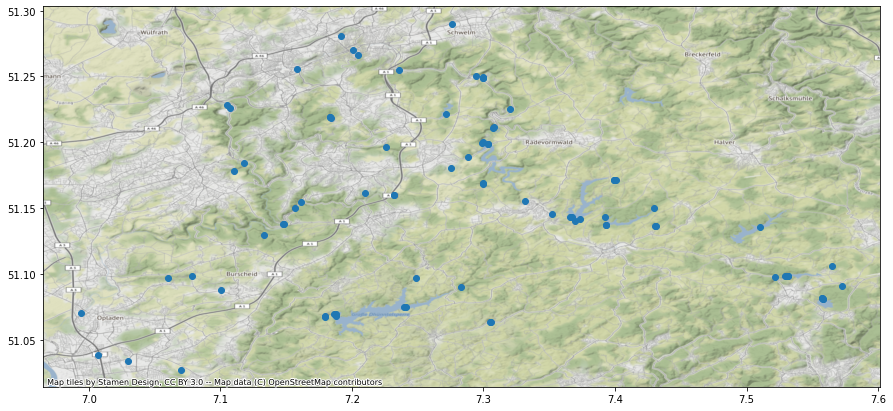

In [12]:
# Static map using GeoDataframe.plot

# sites = sites.to_crs('epsg:3857') # epsg:4326
ax = fluggs_sites.plot(figsize=(15, 15))
ctx.add_basemap(ax, crs=fluggs_sites.crs.to_string())
# optional parameters:
# source=ctx.providers.OpenStreetMap.Mapnik
# zoom=12
ax

In [13]:
# Interactive map using folium

lngs = list(fluggs_sites['geometry'].apply(lambda coord: coord.x))
lats = list(fluggs_sites['geometry'].apply(lambda coord: coord.y))
avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

# folium uses (lat, long) or (y, x), respectively
locationlist = [[site.y, site.x] for site in fluggs_sites['geometry']]

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=10)
for point in range(0, len(locationlist)):
    popup = folium.Popup(folium.IFrame(html=fluggs_sites['site_name'][point], width=200, height=80))
    folium.Marker(locationlist[point], popup=popup).add_to(m)
m

# 3) Sensor data

### 3a) Get sensor data

In [14]:
# Optional arguments for get_data(): procedures, phenomena, sites, begin, end
begin = '2019-01-01T00:00:00Z' 
end = '2019-01-31T23:59:59Z'
procedures = ['2m_Tiefe']
phenomena = ['Wassertemperatur']
sites = ['Opladen']

fluggs_obs = fluggs_sos.get_data(sites=sites, phenomena=phenomena, begin=begin, end=end)

fluggs_obs.head()

,site,procedure,phenomenon,time_stamp,value,unit
0,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 01:00:00+00:00,8.7,°C
1,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 02:00:00+00:00,8.7,°C
2,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 03:00:00+00:00,8.7,°C
3,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 04:00:00+00:00,8.6,°C
4,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 05:00:00+00:00,8.6,°C


In [15]:
# Check unique values in column
fluggs_obs['procedure'].unique()

array(['Einzelwerte'], dtype=object)

In [16]:
# Subset of data frame
#fluggs_obs[(fluggs_obs['site']=='Opladen') & (fluggs_obs['procedure']=='Einzelwerte')]
#fluggs_obs[(fluggs_obs['value'] > 5)] 

### 3b) Plot sensor data

#### Plot a single time series

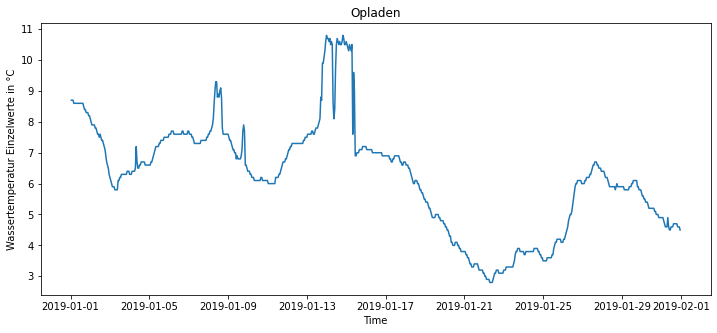

In [17]:
foi = sites[0]
x = fluggs_obs[fluggs_obs['site']==foi]['time_stamp'].to_numpy()
y = fluggs_obs[fluggs_obs['site']==foi]['value'].to_numpy()

plt.figure(figsize=(12,5))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel(fluggs_obs['phenomenon'][0] + " " + fluggs_obs['procedure'][0] + " in " + fluggs_obs['unit'][0])
plt.title(fluggs_obs['site'][0])
plt.show()

#### Plot two time series of two different sites

In [18]:
# Check data availability
fluggs_sos.get_data_availability(observedProperties=['Wassertemperatur'],procedures=['Einzelwerte'])

[Procedure                                                  Einzelwerte
 ObservedProperty                                      Wassertemperatur
 FeatureOfInterest                                            Rutenbeck
 PhenomenonTime       start: 2010-08-29 23:00:00+00:00 end: 2020-08-...
 StartTime                                    2010-08-29 23:00:00+00:00
 EndTime                                      2020-08-30 12:00:00+00:00
 ResultTime                                                        None
 Name: gda_member, dtype: object,
 Procedure                      Einzelwerte
 ObservedProperty          Wassertemperatur
 FeatureOfInterest                  Opladen
 PhenomenonTime       start: None end: None
 StartTime                             None
 EndTime                               None
 ResultTime                            None
 Name: gda_member, dtype: object,
 Procedure                                                  Einzelwerte
 ObservedProperty                               

In [19]:
# New request with two sites
begin = '2019-01-01T00:00:00Z' 
end = '2019-01-31T23:59:59Z'
procedures = ['Einzelwerte']
phenomena = ['Wassertemperatur']
sites = ['Opladen','Laaken']

fluggs_obs = fluggs_sos.get_data(sites=sites, phenomena=phenomena, begin=begin, end=end)
fluggs_obs.head()

,site,procedure,phenomenon,time_stamp,value,unit
0,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 01:00:00+00:00,8.7,°C
1,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 02:00:00+00:00,8.7,°C
2,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 03:00:00+00:00,8.7,°C
3,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 04:00:00+00:00,8.6,°C
4,Opladen,Einzelwerte,Wassertemperatur,2019-01-01 05:00:00+00:00,8.6,°C


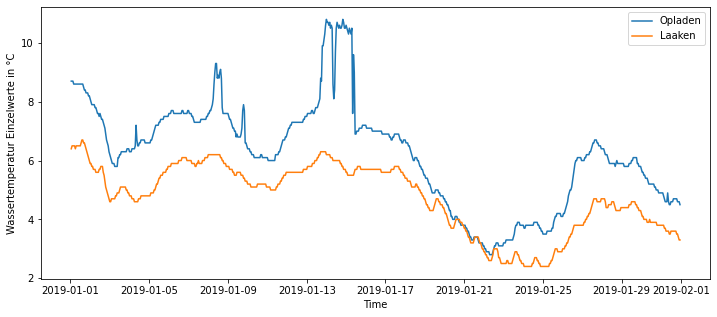

In [20]:
x1 = fluggs_obs[(fluggs_obs['site']==sites[0])]['time_stamp'].to_numpy()
y1 = fluggs_obs[(fluggs_obs['site']==sites[0])]['value'].to_numpy()

x2 = fluggs_obs[(fluggs_obs['site']==sites[1])]['time_stamp'].to_numpy()
y2 = fluggs_obs[(fluggs_obs['site']==sites[1])]['value'].to_numpy()

plt.figure(figsize=(12,5))
plt.plot(x1,y1,label=sites[0])
plt.plot(x2,y2,label=sites[1])
plt.xlabel('Time')
plt.ylabel(fluggs_obs['phenomenon'][0] + " " + fluggs_obs['procedure'][0] + " in " + fluggs_obs['unit'][0])
plt.legend()
plt.show()

#### Plot two time series of two different phenomena

In [21]:
fluggs_sos.get_data_availability(featureOfInterest=['Bever-Talsperre'],observedProperties=['Luftfeuchte','Lufttemperatur'])

[Procedure                                                  Einzelwerte
 ObservedProperty                                        Lufttemperatur
 FeatureOfInterest                                      Bever-Talsperre
 PhenomenonTime       start: 2010-08-29 23:00:00+00:00 end: 2013-06-...
 StartTime                                    2010-08-29 23:00:00+00:00
 EndTime                                      2013-06-12 18:07:30+00:00
 ResultTime                                                        None
 Name: gda_member, dtype: object,
 Procedure                      Einzelwerte
 ObservedProperty               Luftfeuchte
 FeatureOfInterest          Bever-Talsperre
 PhenomenonTime       start: None end: None
 StartTime                             None
 EndTime                               None
 ResultTime                            None
 Name: gda_member, dtype: object]

In [23]:
# New request with two phenomena for one site
begin = '2011-01-01T00:00:00Z' 
end = '2011-01-31T23:59:59Z'
phenomena = ['Luftfeuchte','Lufttemperatur']
sites = ['Bever-Talsperre']

fluggs_obs = fluggs_sos.get_data(sites=sites, phenomena=phenomena, begin=begin, end=end)
fluggs_obs.head()

,site,procedure,phenomenon,time_stamp,value,unit
0,Bever-Talsperre,Einzelwerte,Lufttemperatur,2011-01-01 01:37:30+00:00,-0.80,°C
1,Bever-Talsperre,Einzelwerte,Lufttemperatur,2011-01-01 04:52:30+00:00,-0.30,°C
2,Bever-Talsperre,Einzelwerte,Lufttemperatur,2011-01-01 04:52:35+00:00,-0.28,°C
3,Bever-Talsperre,Einzelwerte,Lufttemperatur,2011-01-01 06:37:30+00:00,0.00,°C
4,Bever-Talsperre,Einzelwerte,Lufttemperatur,2011-01-01 06:52:30+00:00,0.00,°C


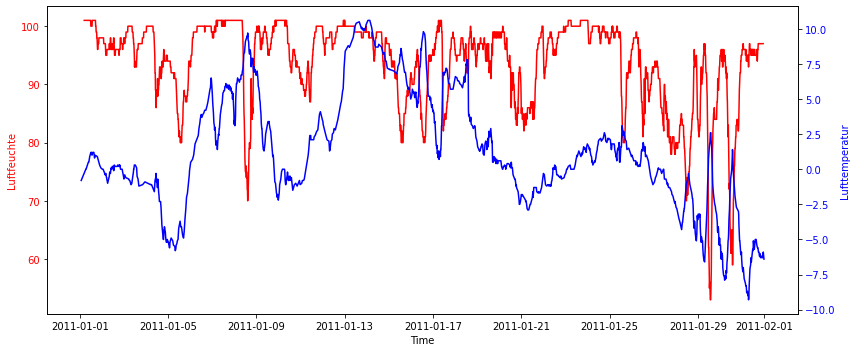

In [26]:
x3 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[0])]['time_stamp'].to_numpy()
y3 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[0])]['value'].to_numpy()

x4 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[1])]['time_stamp'].to_numpy()
y4 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[1])]['value'].to_numpy()

fig, ax1 = plt.subplots(figsize=(12,5))

color = 'red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Luftfeuchte', color=color)
ax1.plot(x3, y3, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'blue'
ax2.set_ylabel('Lufttemperatur', color=color)  
ax2.plot(x4, y4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

#### Data sub-sampling

In [29]:
interval = '4h'

# Phenomenon 1
df1 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[0])]
df1 = df1[['time_stamp','value']]

# Remove duplicate time stamps and sub-sample data
grouped = df1.groupby('time_stamp')['value']
grouped = grouped.agg('mean')
df1 = pd.DataFrame(grouped)
df1_sub = df1.resample(interval).nearest()
df1_sub = df1_sub.reset_index()


# Phenomenon 2
df2 = fluggs_obs[(fluggs_obs['phenomenon']==phenomena[1])]
df2 = df2[['time_stamp','value']]

# Remove duplicate time stamps and sub-sample data
grouped = df2.groupby('time_stamp')['value']
grouped = grouped.agg('mean')
df2 = pd.DataFrame(grouped)
df2_sub = df2.resample(interval).nearest()
df2_sub = df2_sub.reset_index()

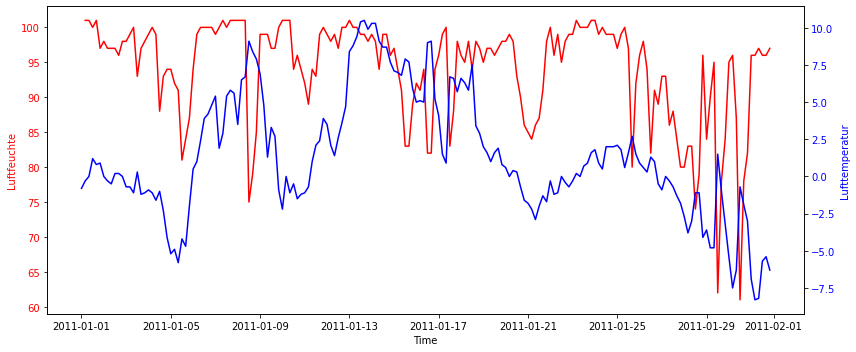

In [30]:
x3 = df1_sub['time_stamp'].to_numpy()
y3 = df1_sub['value'].to_numpy()

x4 = df2_sub['time_stamp'].to_numpy()
y4 = df2_sub['value'].to_numpy()

fig, ax1 = plt.subplots(figsize=(12,5))

color = 'red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Luftfeuchte', color=color)
ax1.plot(x3, y3, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'blue'
ax2.set_ylabel('Lufttemperatur', color=color)  
ax2.plot(x4, y4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

#### Histogram and Kernel density estimation (KDE)

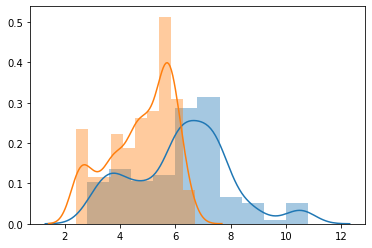

In [31]:
sns.distplot(y1, bins=10);
sns.distplot(y2, bins=10);

#### 2D KDE

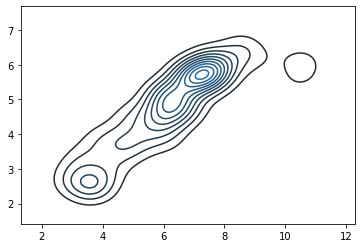

In [32]:
sns.kdeplot(y1,y2);

#### Joint plots/Correlation

/home/martin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


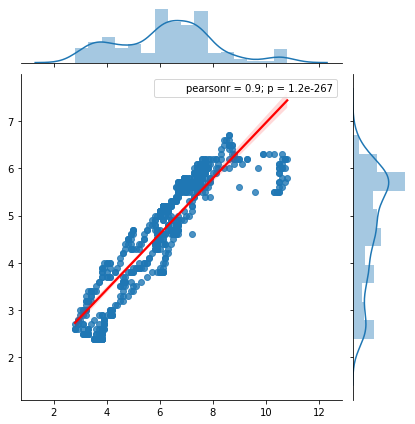

In [33]:
sns.jointplot(y1, y2, kind='reg', joint_kws={'line_kws':{'color':'red'}}).annotate(stats.pearsonr);

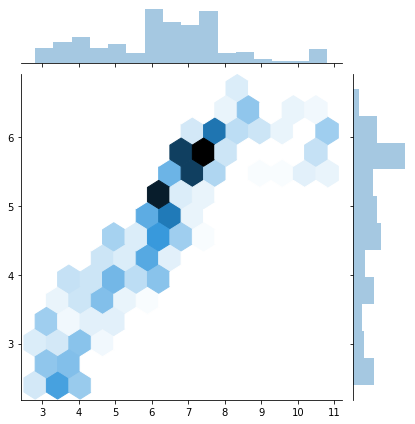

In [34]:
sns.jointplot(y1, y2, kind='hex');

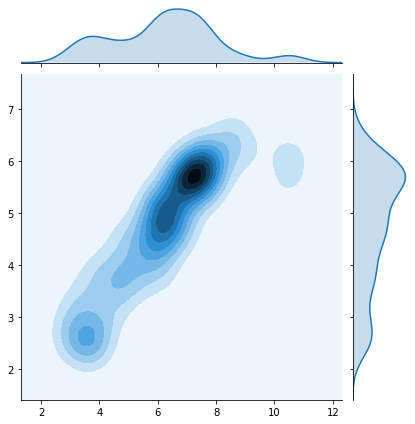

In [35]:
sns.jointplot(y1, y2, kind='kde');